<a href="https://colab.research.google.com/github/QorbQuant/Dune/blob/main/concentrator_FXS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import os

# Set the DUNE_API_KEY environment variable
os.environ['DUNE_API_KEY'] = 'DUNE_API_KEY'

In [4]:
!pip install dune_spice

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 42.3 MB/s eta 0:00:00
  Attempting uninstall: polars
    Found existing installation: polars 0.20.2
    Uninstalling polars-0.20.2:
      Successfully uninstalled polars-0.20.2


In [7]:
import spice

df = spice.query(3870886)

getting results, query_id = 3870886


In [8]:
df.head()

time,FXS_price,cvxFXS_price,net_cvxfxs,return,cvxfxs_staked,yield_adjusted_price
str,f64,f64,f64,f64,f64,f64
"""2022-11-18""",4.465486,4.13229,null,1.047868,1459.350582,4.330096
"""2023-01-17""",9.278229,8.068455,null,1.061223,47493.13614,8.562434
"""2024-05-27""",4.710382,3.788241,null,2.44466,26196.000533,9.26096
"""2024-07-03""",2.68,2.172879,null,2.470824,24523.677433,5.368801
"""2022-10-25""",5.945347,5.583127,null,1.022124,3695.403869,5.706649


In [9]:
df_pandas = df.to_pandas()


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter



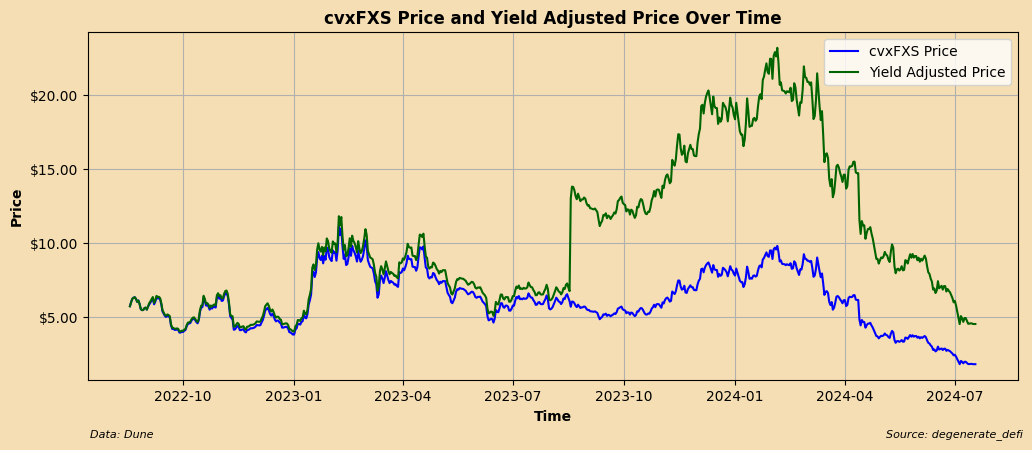

In [62]:
# Function to format y-axis labels with dollar sign
def dollar_format(x, pos):
    return f'${x:.2f}'

# Plotting the data
fig, ax = plt.subplots(figsize=(12, 6), facecolor='#f5deb3')  # Lighter tan background for the figure
ax.set_facecolor('#f5deb3')  # Lighter tan background for the axes
ax.plot(df_pandas['time'], df_pandas['cvxFXS_price'], label='cvxFXS Price', color='blue')
ax.plot(df_pandas['time'], df_pandas['yield_adjusted_price'], label='Yield Adjusted Price', color='darkgreen')
ax.set_xlabel('Time', fontweight='bold')
ax.set_ylabel('Price', fontweight='bold')
ax.set_title('cvxFXS Price and Yield Adjusted Price Over Time', fontweight='bold')

# Apply dollar formatting to y-axis
ax.yaxis.set_major_formatter(FuncFormatter(dollar_format))

# Adjust layout to make space for annotations below the graph
fig.subplots_adjust(bottom=0.3)

# Add source and data annotations below the graph
fig.text(0.79, 0.2, 'Source: degenerate_defi', ha='left', va='bottom', fontsize=8, fontstyle='italic')
fig.text(0.18, 0.2, 'Data: Dune', ha='right', va='bottom', fontsize=8, fontstyle='italic')

ax.legend()
ax.grid(True)
plt.show()
